In [5]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Understanding the Math Behind PCA and CCA</h2>

In [257]:
# Using the iris dataset as an example here.
iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

In [281]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<p>Here we have 150 data points with 4 different features and three targets</p>
<p></p>

In [21]:
A = df[iris['feature_names']]
A

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [27]:
A_bar = A - A.mean(axis=0)
A_bar

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [437]:
a = (A_bar.to_numpy())
a_t = (A_bar.to_numpy().transpose())
C = a_t @ a / (a.shape[0] - 1)
# This is the correlation matrix
np.cov(a, rowvar=False).shape

(4, 4)

In [215]:
#Now, the question is, how many parameters do we want to reduce this into?
# We can sort these eigen vectors in the order of their eigenvalues
eigvalues, eigvectors = np.linalg.eig(C)
sorted_indices = np.argsort(eigvalues)[::-1]
new_basis = eigvectors[:, sorted_indices[:2]]
#new_basis = np.array(eig_vecs) # Now we can multiply the data points by this correlation 
new_basis.shape

(4, 2)

In [219]:
new_data = A_bar.to_numpy() @ new_basis
new_data.shape
new_data[:, 2:]

array([], shape=(150, 0), dtype=float64)

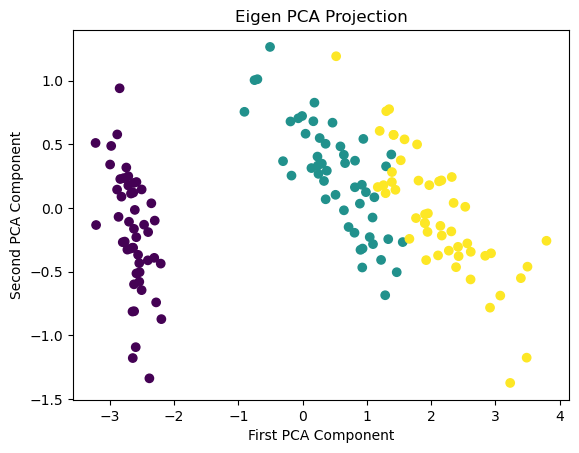

In [221]:

plt.title("Eigen PCA Projection")
plt.scatter(x=new_data[:, 0], y=new_data[:, 1], c=df["target"])
plt.xlabel("First PCA Component")
plt.ylabel("Second PCA Component")
plt.show()

In [237]:
#Shortcuts for the above
A = df[iris['feature_names']] # Removes the feature names / row numbers
cov_mat = A.cov()


In [239]:
cov_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


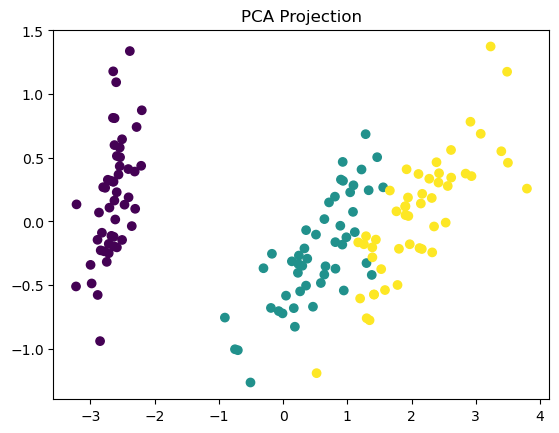

In [251]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_projected = pca.fit_transform(A)
plt.figure()
plt.title("PCA Projection")
plt.scatter(x=pca_projected[:, 0], y=pca_projected[:, 1], c=df['target'])

<h2>Canonical Correlation Analysis</h2>
<p>This is an extension of PCA, what if we have set of random variables X that correlate to a set of random variables Y? If we want to reduce the dimensionality, we want to maximize the correlative relationship that we have between the two sets of data.</p>
<p>What we're looking for is some set of transformation matrices A and B such that applying these transformations to the data maintains the most correlative information in order of variables, so that if we eliminated some, we would retain the most information between the two sets.</p>
<p>This is found by solving the optimization problem</p>
p = max $\frac{a^{T}C_{X,Y}b}{\sqrt{a^{T}C_{X_X}a}\sqrt{b^{T}C_{Y_Y}b}}$ 
<p></p>
<p>The solution of this is the eigendecompposition:</p>

${C_{X,X}}^{-1}{C_{X,Y}}{C_{Y,Y}}^{-1}{C_{Y,X}}a = \lambda a$
<p>and</p>
${C_{Y,Y}}^{-1}{C_{Y,X}}{C_{X,X}}^{-1}{C_{X,Y}}b = \lambda b$

In [322]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

In [310]:
#So if we do this manually. Let's use the california datasetd
data = datasets.fetch_california_housing(as_frame=True)
df = data.frame
df.head() #First 5 rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [332]:
df.shape

(20640, 9)

In [340]:
#Quick EDA
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


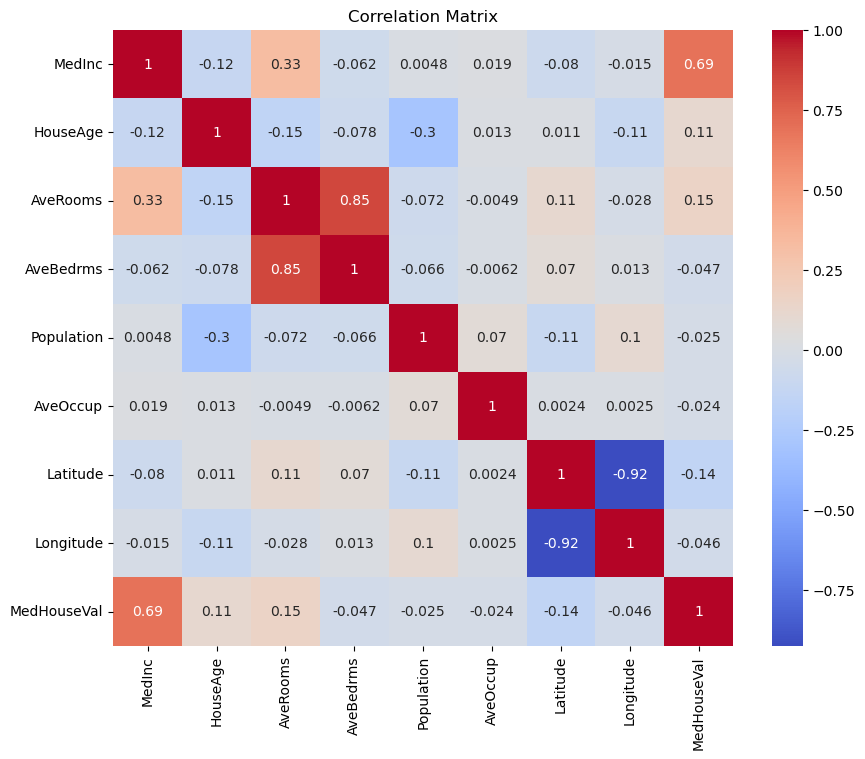

In [344]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') #Visualization of the matrix
plt.title("Correlation Matrix")
plt.show()

In [346]:
#So let's find the corresponding correlation matrices
#First, we need to establish which random variables belong to which set.
#in this case, we'll say that {MedInc, HouseAge, AveRooms, AveBedrooms, Population} are part of the random variables X
# and {AveOccup, Latitude, Longitude, MedHouseVal} are a part of the random variables Y
view1 = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']]
view2 = df[['Population', 'AveOccup', 'Latitude', 'Longitude']]

In [350]:
StandardScaler?

Init signature: StandardScaler(*, copy=True, with_mean=True, with_std=True)
Docstring:     
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

Centering and scaling happen independently on each feature by computing
the relevant statistics on the samples in the training set. Mean and
standard deviation are then stored to be used on later data using
:meth:`transform`.

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of
a learning algorithm (such as the RBF kernel of Suppor

In [431]:
scaler = StandardScaler()
view1_scaled = scaler.fit_transform(view1)
view2_scaled = scaler.fit_transform(view2)

Signature:      
np.corrcoef(
    x,
    y=None,
    rowvar=True,
    bias=<no value>,
    ddof=<no value>,
    *,
    dtype=None,
)
Call signature:  np.corrcoef(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function corrcoef at 0x105a7b2e0>
File:            /opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py
Docstring:      
Return Pearson product-moment correlation coefficients.

Please refer to the documentation for `cov` for more detail.  The
relationship between the correlation coefficient matrix, `R`, and the
covariance matrix, `C`, is

.. math:: R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} C_{jj} } }

The values of `R` are between -1 and 1, inclusive.

Parameters
----------
x : array_like
    A 1-D or 2-D array containing multiple variables and observations.
    Each row of `x` represents a variable, and each column a single
    observation of all those variables. Also see `rowvar` below.
y : array_like, optional
    An additional se

In [587]:
#C_XX
v1 = (view1_scaled)[:500]
v1_c = np.cov(v1, rowvar=False)

#C_YY
v2 = (view2_scaled)[:500]
v2_c = np.cov(v2, rowvar=False)

#Note that for the covariance matrices between the two 
#C_XY 
c_xy = np.cov(v1, v2, rowvar=False)[4:, :4]
#C_YX
c_yx = c_xy.T

#Find a matirix to perform correlations between variables

#For A
solution_matrix_A = np.linalg.inv(v1_c) @ c_xy @ np.linalg.inv(v2_c) @ c_yx

#For B
solution_matrix_B = np.linalg.inv(v2_c) @ c_yx @ np.linalg.inv(v1_c) @ c_xy

In [589]:
np.cov(v1, v2, rowvar=False)

array([[ 9.27950761e-01,  5.81371047e-04,  3.60316309e-01,
        -4.80066775e-02, -4.63402086e-02, -1.32631017e-02,
         5.58815175e-03,  3.69373822e-03],
       [ 5.81371047e-04,  5.24632726e-01,  3.11186017e-02,
        -6.56712886e-03, -4.72088339e-02,  2.07520085e-03,
         3.70441252e-03, -3.77126236e-03],
       [ 3.60316309e-01,  3.11186017e-02,  2.50214651e-01,
         1.57752317e-02, -5.02836795e-02, -4.11519993e-03,
         1.14190687e-03,  2.49686748e-03],
       [-4.80066775e-02, -6.56712886e-03,  1.57752317e-02,
         4.57479084e-02,  1.21513950e-03, -5.38502140e-04,
        -4.06938810e-04, -4.32581867e-04],
       [-4.63402086e-02, -4.72088339e-02, -5.02836795e-02,
         1.21513950e-03,  2.47845214e-01,  2.06644068e-03,
         2.20376440e-04,  4.66238697e-05],
       [-1.32631017e-02,  2.07520085e-03, -4.11519993e-03,
        -5.38502140e-04,  2.06644068e-03,  7.28993654e-03,
        -5.84579034e-04,  4.10755131e-04],
       [ 5.58815175e-03,  3.704412

In [591]:
#Now we find the eigenvectors of these matrices
A_eigvals, A_eigvectors = np.linalg.eig(solution_matrix_A)
A_indices = np.argsort(A_eigvals)[::-1]
A_basis = A_eigvectors[:, A_indices]

B_eigvals, B_eigvectors = np.linalg.eig(solution_matrix_B)
B_indices = np.argsort(B_eigvals)[::-1]
B_basis = B_eigvectors[:, B_indices]

In [593]:
#Apply the transformation to our data
A_new = v1 @ A_basis
B_new = v2 @ B_basis

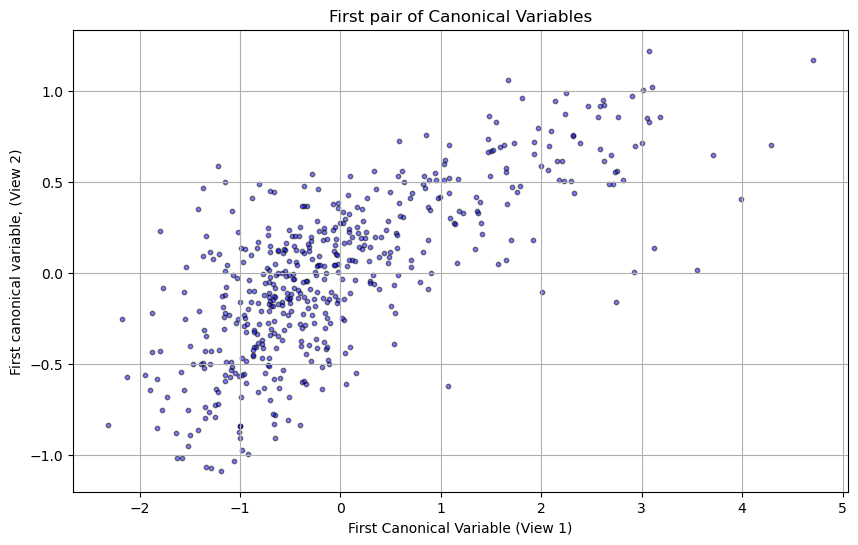

In [609]:
#Plotting first pair of canonical variables
plt.figure(figsize=(10,6))
plt.scatter(view1_c[:, 0], view2_c[:, 0], c='blue', edgecolors='k', s=10, alpha=0.5)
plt.xlabel('First Canonical Variable (View 1)')
plt.ylabel('First canonical variable, (View 2)')
plt.title('First pair of Canonical Variables')
plt.grid(True)
plt.show()

In [601]:
#We can apply now just use CCA from sklearn instead.
view_1_subset = view1_scaled[:500]
view_2_subset = view2_scaled[:500]

#Perform CCA
cca = CCA(n_components=2)
view1_c, view2_c = cca.fit_transform(view_1_subset, view_2_subset)

np.corrcoef(view1_c, view2_c)[0,1]

1.0

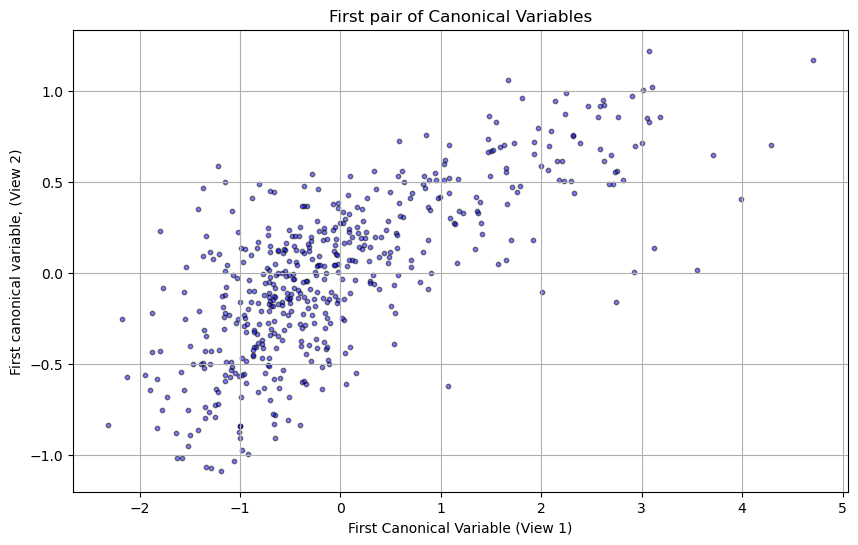

In [603]:
#Plottin first pair of canonical variables
plt.figure(figsize=(10,6))
plt.scatter(view1_c[:, 0], view2_c[:, 0], c='blue', edgecolors='k', s=10, alpha=0.5)
plt.xlabel('First Canonical Variable (View 1)')
plt.ylabel('First canonical variable, (View 2)')
plt.title('First pair of Canonical Variables')
plt.grid(True)
plt.show()

In [597]:
# Scale views separately
scaler1 = StandardScaler()
scaler2 = StandardScaler()
view1_scaled = scaler1.fit_transform(view1)[:500]
view2_scaled = scaler2.fit_transform(view2)[:500]

# Compute covariance matrices
v1_c = np.cov(view1_scaled, rowvar=False)
v2_c = np.cov(view2_scaled, rowvar=False)

# Compute cross-covariance directly
c_xy = np.cov(view1_scaled.T, view2_scaled.T)[:view1.shape[1], view1.shape[1]:]
c_yx = c_xy.T

# Compute solution matrices
solution_matrix_A = np.linalg.inv(v1_c) @ c_xy @ np.linalg.inv(v2_c) @ c_yx
solution_matrix_B = np.linalg.inv(v2_c) @ c_yx @ np.linalg.inv(v1_c) @ c_xy

# Compute eigenvectors correctly
A_eigvals, A_eigvectors = np.linalg.eig(solution_matrix_A)
A_indices = np.argsort(A_eigvals)[::-1]
A_basis = A_eigvectors[:, A_indices]

B_eigvals, B_eigvectors = np.linalg.eig(solution_matrix_B)
B_indices = np.argsort(B_eigvals)[::-1]
B_basis = B_eigvectors[:, B_indices]

# Apply transformations
A_new = view1_scaled @ A_basis
B_new = view2_scaled @ B_basis

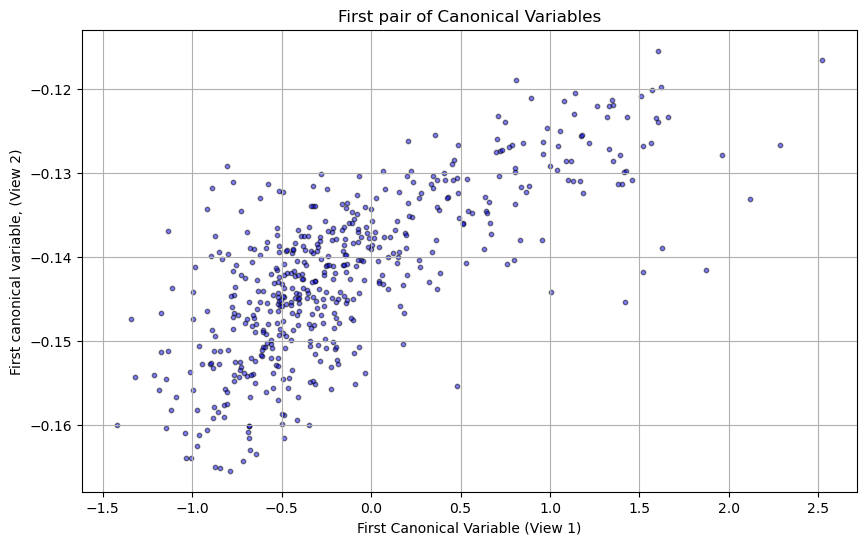

In [607]:
#Plotting first pair of canonical variables
plt.figure(figsize=(10,6))
plt.scatter(A_new[:, 0] * -1, B_new[:, 0], c='blue', edgecolors='k', s=10, alpha=0.5)
plt.xlabel('First Canonical Variable (View 1)')
plt.ylabel('First canonical variable, (View 2)')
plt.title('First pair of Canonical Variables')
plt.grid(True)
plt.show()